## Computer visions
camera collaboration, image.video processsing, filtering, denoising, save

#### Use cases
object detection, face recognition, medical image recognition, license number plate recognition, helmet detection,

#### python specific: OpenCV, Openvino, PIL.... Cloud computing, azure, google gcp, AWS

#### opencv: image filter, video processing, thresholding bluring, face recognition, object detection

In [ ]:
# conda install conda-forge::opencv

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Applications/anaconda3/lib/python3.12/site-packages/libmambapy/bindings.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.20.dylib
  Referenced from: <496442DC-0EDE-3705-A2B5-401A4FC0D733> /Applications/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Applications/anaconda3/lib/libarchive.20.dylib' (no such file), '/Applications/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/Applications/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/Applications/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/Applications/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/usr/local/lib/libarchive.20.dylib' (no such file), '/usr/lib/libarchive.20.dylib' (no such file, not in dyld cache))

CondaValueError: You have chosen a non-default solver backend (libmamba) but it was not recognized. C

In [ ]:
# print(cv2.__version__)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread("image.jpeg")

In [4]:
# for color image it is 3d which is shown below
img.shape

(1028, 1024, 3)

In [5]:
#converting image to grey scale i.e, 2d


In [6]:
#open image
cv2.imshow("girl", img) #color chanel: bgr
cv2.waitKey(0)

32

In [7]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

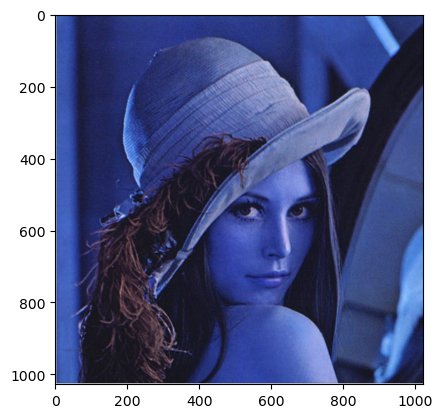

In [8]:
plt.imshow(img) #color chanael: rgb

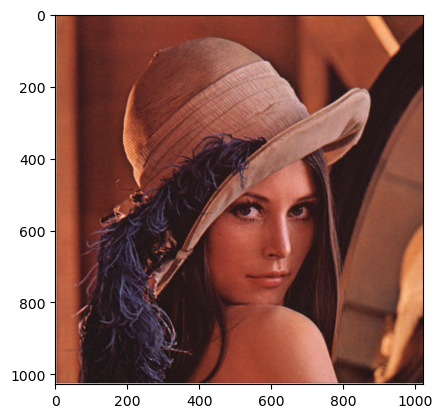

In [9]:
plt.imshow(img_rgb)

In [ ]:
# converting to gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image grey", img_gray)
cv2.waitKey(0)

In [ ]:
#resizing
print(img.shape)

In [ ]:
resized_img = cv2.resize(img,(500,100))
plt.imshow(resized_img)
plt.show()

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
aspect_img = cv2.resize(img_rgb, (0,0), img_rgb,0.5,0.5)

plt.imshow(aspect_img)
plt.show()


In [ ]:
#flip
flipped_img = cv2.flip(img_rgb, 0)
plt.imshow()
plt.show()

In [9]:
# Video

# cap = cv2.VideoCapture("sample_video.mp4")

# while True:
#     is_true, frame = cap.read()
#     cv2.imshow("Video", frame)
#     if(cv2.waitKey(20) & 0xff) == ord('q'):
#         break

# # cap.reload() 

# cap.release()
# cv2.destroyAllWindows()


cap = cv2.VideoCapture("sample_video.mp4")

while True:
    is_true, frame = cap.read()
    if not is_true:
        break 
    
    cv2.imshow("Video", frame)
    
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
# ltrb --> x1y1, x2y2 --> Left top point and Right bottom point
# xywh --> x1y1, width, height

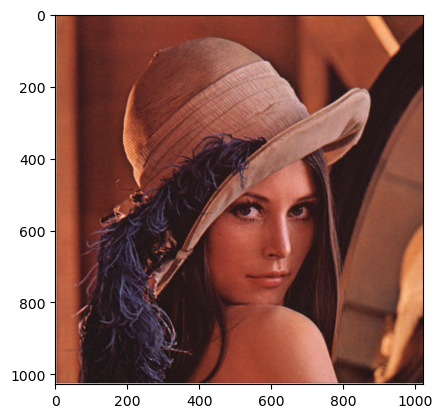

In [17]:
# image cropping

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

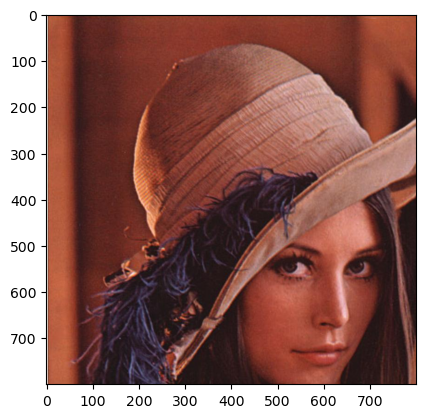

In [18]:
cropped_img = rgb_img[0:800,0:800] #x,y

plt.imshow(cropped_img)
plt.show()

In [27]:
# croppped_img = rgb_img[100:400,100:400] 
# plt.imshow(cropped_img)
# plt.show()

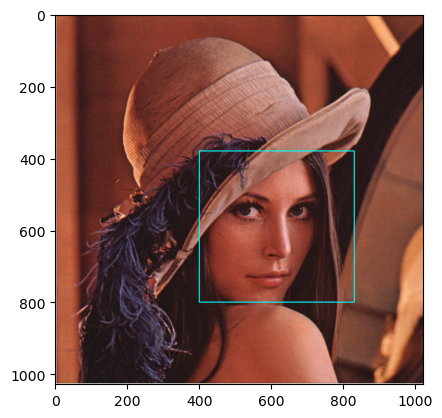

In [28]:
#drawing
detected_bbox = (400,380,830,800)
cv2.rectangle(rgb_img, (400,380), (830,800), (0,255,255), 2)
plt.imshow(rgb_img)
plt.show()

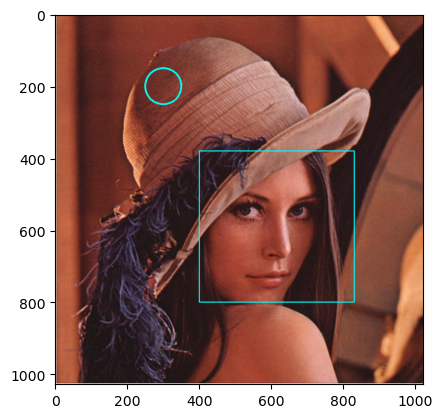

In [31]:
cv2.circle(rgb_img, (300,200), 50, (0,255,255), 3) #cordinates, radius, color, line width
plt.imshow(rgb_img)
plt.show()

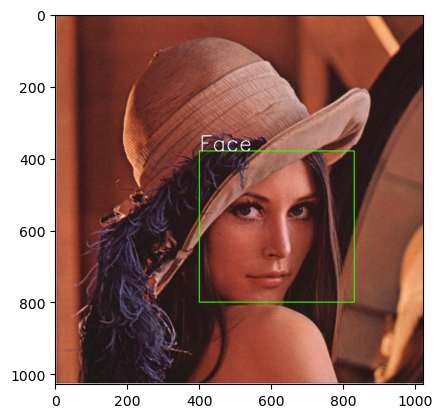

In [37]:
#adding labels in bbox co-ordinate

l,t,r,b = [400,380,830,800]
cv2.rectangle(img, (l,t), (r,b), (0,255,50), 2)
cv2.putText(img, "Face", (l,t), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## image agumentation

In [ ]:
def translate (img, x,y):

    trans_mat = np.float32([[1,0,x],[0,1,y]])
    dims = (img.shape[1],img.shape[0])
    translated_img = cv2.warpAffine(img, trans_mat, dims)
    return translated_img

translated_img = translate(img, 800, 800)
img = cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()
cv2.imshow("translated image", translated_img)
cv2.waitKey(0)

cv2.destroyAllWindows()
    






Translate the input image by shifting it along the x and y axis.
img: image to be translated.

x-axis: the no. of pixels to shift the image along the x-axis(horizontal direction)
y-axis: the no. of pixels to shift the imag along the y--axis(vertical direction)

transMat is a matrix that defines how the image should be shifted . it is matrix used in affine transformation. The elements 1 and 0 control he scaling and shearing of the image and x
x: moves the image horizontally
y: moves the image vertically


cv2.warpAffine() applies the affine transformation defined by the translation matrix (transMat) to the image. It moves the image as specified, and dims defined the size of the output image

affine -> scaling, rotation, translating, transformation

In [ ]:
dims = (img.shape[1], img.shape[0])#trasformed
points_1 = np.float32([[50,50],[200,50],[50,200]])
points_2 = np.float32([[10,100],[200,50],[100,250]])

transformation_matrix = cv2.getAffineTransform(points_1,points_2)
transformed_img = cv2.warpAffine(img, transformation_matrix, dims)
plt.imshow(transformed_img)
plt.show()

In [ ]:
# rotation matrix 2d --> image_width/2, imge_height/2, 45 --> cloackwise rotation

In [ ]:
img = cv2.imread("img.jpeg")

image_width,image_height = (img.shape[1],imag.shape[0])

rotation_matrix = cv2.getRotationMatrix2D(image_width/2, image_height/2, 45,1)
rotated_image = cv2.wrapAffine(img,rotation_matrix, (image_width,image_height))

rotated_image = cv2.cvtColor(rotated_image,cv2.COLOR_BGR2RGB)
plt.imshow()
plt.show()

In [ ]:
#image blur

blur_img = cv2.GussianBlur(img, (15,15), 5) #image, kernal size,
blur_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
plt.imshow(blur_img)
plt.show()

## Contour Detection

Contour means the boundary of object made by continuous points. It helps to find shape of object in image. Contour and edge are not same â€” edge is sudden change in pixel value, but contour focus on object shape.

Contour detection is useful in image segmentation, object detection, and feature extraction. It helps to understand structure, analyze shape, and recognize pattern in image.


## Threholding/binarization:
binarizing image, this is technique to convert a grayscale image into binary image (0 or 255) minimum to max

minimum: black

maximum: white

In [7]:
# thresholding
img = cv2.imread("image.jpeg")

#I. Simple thresholding
_, thresholded_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#II. inverse thresholding
_, thresholded_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_BINARY)

#otsu's thresholding --> automatically choose threshold value
thres_val=thresholded_img(img, 0, 255, cv2.THRES_OTSU)
print(thres_val)

threshold_img = cv2.cvtColor(thresholded_img, cv2.COLOT_BGR2RGB)
plt.imread(thresholded_img)
plt.show()

AttributeError: module 'cv2' has no attribute 'THRES_OTSU'

#### Applications
- Document Scanning: Convert scans to binary to make text clear (adaptive/otsu)
- License plate detection: separate plate from background
- Medical imaging: segment out cells or tumors
- Object detection (preprocessing): Prepare images for counter detection or shape recognition

## Haar Cascade face detection


1


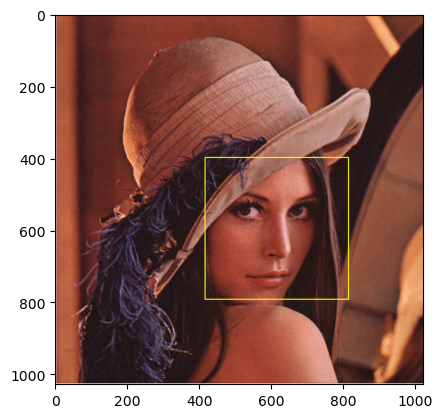

In [12]:
img = cv2.imread("image.jpeg")

#load the model
haar_cascade_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = haar_cascade_model.detectMultiScale(img,scaleFactor=1.1,minNeighbors=1)
print(len(faces))

for face in faces:
    x,y,w,h = face
    cv2.rectangle(img, (x,y), (x+y, y+h), (0,255,255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [13]:
# USE EYE AND NOSE DEETCTOR CASCADE MODEL TO DETECT NOSE AND WYWES --> ASSIGNMENT

In [14]:
#HAAR --> FACE DETECT --> trained model-->svm, transfer learning --> mobilenet, vggnet, resnet50 --> transfer learning --> face recognition-->?


In [ ]:
# assignment with pyimage search with dblib library --> locally runnable 